<a href="https://colab.research.google.com/github/tyuminarita/code-example/blob/main/pr4pr3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Точность сети: 94.81%


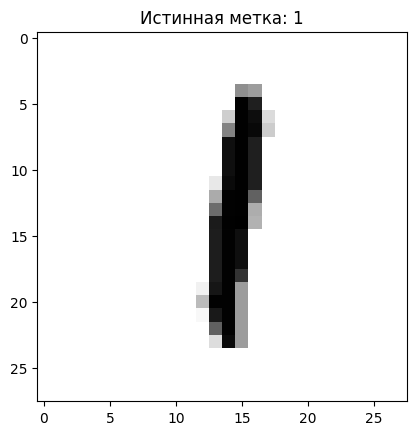

Предсказание сети: 1
Правильная метка: 1


In [2]:
import numpy as np
import pandas as pd
import scipy.special
import matplotlib.pyplot as plt
import random  # <--- Для случайного выбора

# Класс нейросети
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5),
                                    (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5),
                                    (self.onodes, self.hnodes))

        self.lr = learningrate
        self.activation_function = lambda x: scipy.special.expit(x)

    def train(self, inputs_list, targets_list):
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs
        hidden_errors = np.dot(self.who.T, output_errors)

        self.who += self.lr * np.dot((output_errors * final_outputs * (1 - final_outputs)),
                                     hidden_outputs.T)
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1 - hidden_outputs)),
                                     inputs.T)

    def query(self, inputs_list):
        inputs = np.array(inputs_list, ndmin=2).T
        hidden_inputs = np.dot(self.wih, inputs)
        hidden_outputs = self.activation_function(hidden_inputs)

        final_inputs = np.dot(self.who, hidden_outputs)
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

# ===============================
# Параметры сети и инициализация
# ===============================
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.1

nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# ========================
# Загрузка обучающих данных
# ========================
train_data = pd.read_csv('/content/mnist_train.csv', on_bad_lines='skip')

for i in range(len(train_data)):
    row = train_data.iloc[i].to_numpy()
    label = int(row[0])
    inputs = (row[1:] / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[label] = 0.99
    nn.train(inputs, targets)

# ========================
# Тестирование на тесте
# ========================
test_data = pd.read_csv('/content/mnist_test.csv', on_bad_lines='skip')
scorecard = []

for i in range(len(test_data)):
    row = test_data.iloc[i].to_numpy()
    correct_label = int(row[0])
    inputs = (row[1:] / 255.0 * 0.99) + 0.01
    outputs = nn.query(inputs)
    label = np.argmax(outputs)
    scorecard.append(1 if label == correct_label else 0)

accuracy = np.mean(scorecard)
print(f'Точность сети: {accuracy * 100:.2f}%')

# ========================
# === Вывод случайного изображения ===
# ========================
index = random.randint(0, len(test_data) - 1)
sample = test_data.iloc[index].to_numpy()
true_label = int(sample[0])
image_data = sample[1:]

# Показ изображения
plt.imshow(image_data.reshape(28, 28), cmap='Greys', interpolation='None')
plt.title(f"Истинная метка: {true_label}")
plt.show()

# Подготовка и предсказание
inputs = (image_data / 255.0 * 0.99) + 0.01
outputs = nn.query(inputs)
predicted_label = np.argmax(outputs)

print(f"Предсказание сети: {predicted_label}")
print(f"Правильная метка: {true_label}")


Размер таблицы = (7385, 12)

Виды марок машин: ['ACURA' 'ALFA ROMEO' 'ASTON MARTIN' 'AUDI' 'BENTLEY' 'BMW' 'BUICK'
 'CADILLAC' 'CHEVROLET' 'CHRYSLER' 'DODGE' 'FIAT' 'FORD' 'GMC' 'HONDA'
 'HYUNDAI' 'INFINITI' 'JAGUAR' 'JEEP' 'KIA' 'LAMBORGHINI' 'LAND ROVER'
 'LEXUS' 'LINCOLN' 'MASERATI' 'MAZDA' 'MERCEDES-BENZ' 'MINI' 'MITSUBISHI'
 'NISSAN' 'PORSCHE' 'RAM' 'ROLLS-ROYCE' 'SCION' 'SMART' 'SRT' 'SUBARU'
 'TOYOTA' 'VOLKSWAGEN' 'VOLVO' 'GENESIS' 'BUGATTI']


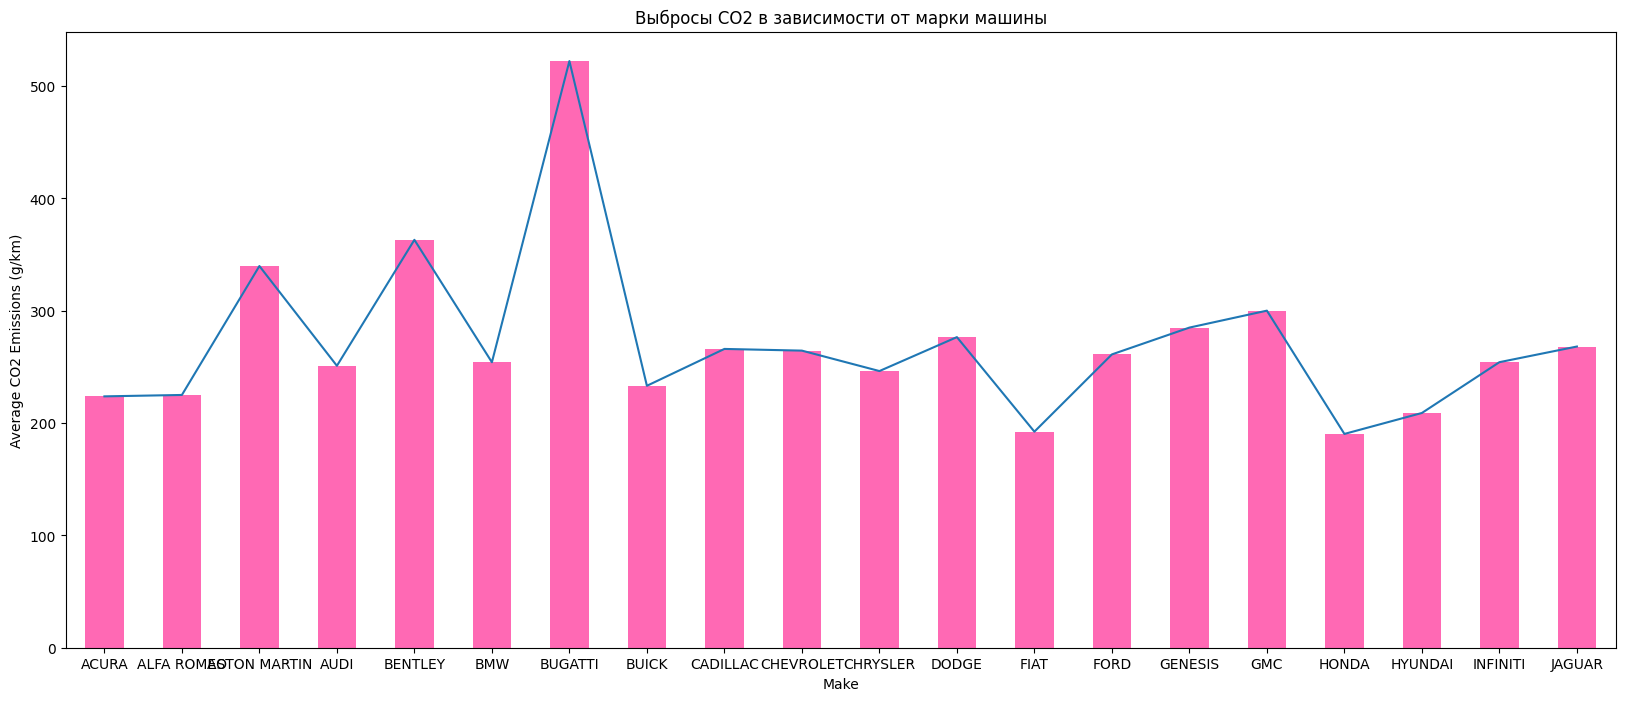

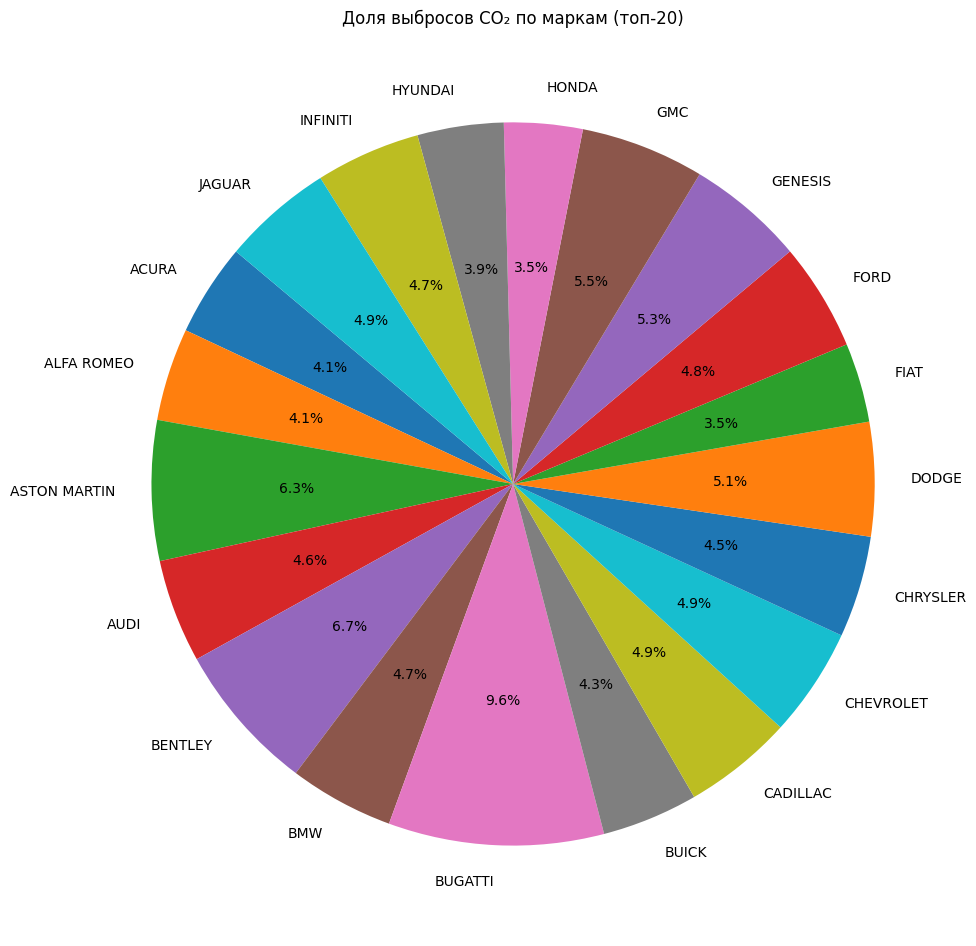

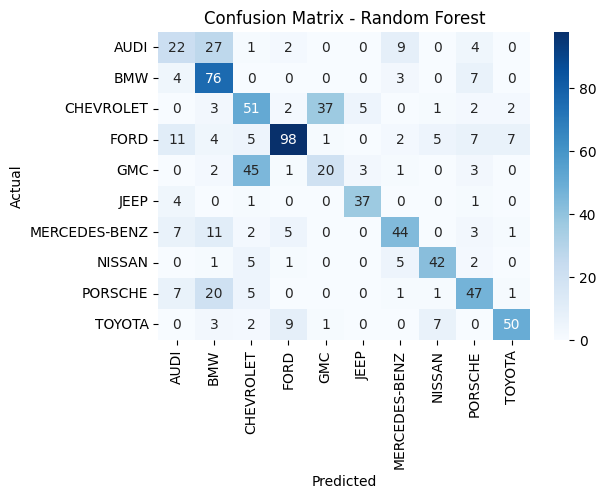

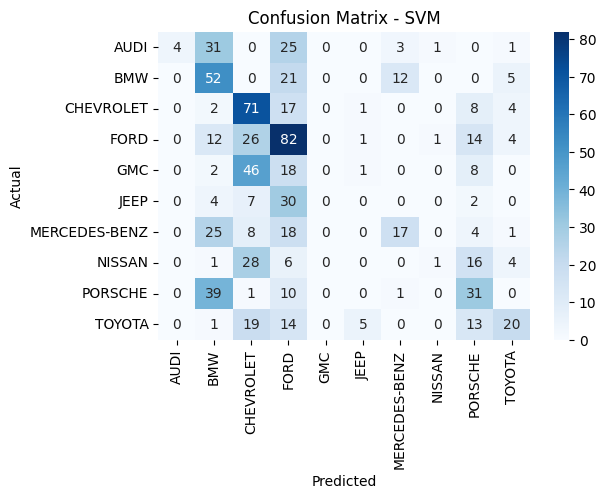

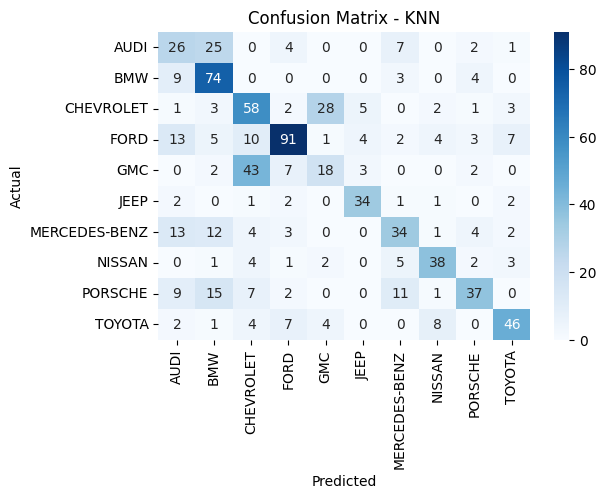

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

# Загрузка и первичный анализ данных
df = pd.read_csv('19 CO2 Emissions.csv')
print('Размер таблицы =', df.shape)
print('\nВиды марок машин:', df['Make'].unique())

df_CO2tomake = df.groupby('Make')['CO2 Emissions(g/km)'].mean()

top_result = df_CO2tomake.head(20)
top_result.plot(kind='bar', figsize=(20,8), color='hotpink')
plt.title('Выбросы СО2 в зависимости от марки машины')
plt.xlabel('Car Make')
plt.ylabel('Average CO2 Emissions (g/km)')
top_result.plot()

plt.figure(figsize=(10, 10))
top_result.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Доля выбросов CO₂ по маркам (топ-20)')
plt.ylabel('')  # Убираем подпись оси Y
plt.tight_layout()
plt.show()

df = df.dropna()  # удаляем пропуски
X = df[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y_reg = df['CO2 Emissions(g/km)']
y_clf = df['Make']

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)

models_reg = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet()
}

for name, model in models_reg.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)


# Учитываем только топ-3 марки для сбалансированной классификации
top_makes = df['Make'].value_counts().head(10).index
df_clf = df[df['Make'].isin(top_makes)]
X_clf = df_clf[['Engine Size(L)', 'Cylinders', 'Fuel Consumption Comb (L/100 km)']]
y_clf = df_clf['Make']
X_clf_scaled = scaler.fit_transform(X_clf)

le = LabelEncoder()
y_clf_encoded = le.fit_transform(y_clf)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf_scaled, y_clf_encoded, test_size=0.2, random_state=42)

models_clf = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for name, model in models_clf.items():
    model.fit(X_train_clf, y_train_clf)
    y_pred_clf = model.predict(X_test_clf)

    # Матрица ошибок
    cm = confusion_matrix(y_test_clf, y_pred_clf)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()